## Introduction

This project analyses a mental health survey conducted among professionals working in the technology sector.
The objective is to clean the data, explore patterns related to mental health treatment and workplace support, visualise key insights, and 
apply a simple machine learning model to predict treatment-seeking behaviour.

This project contains:
- Data cleaning and preprocessing.
- Exploratory Data Analysis (EDA).
- Data visualisation.
- Machine learning.
- Business-relevant insights.

## Import Libraries and Dataset Loading

In [2]:
# Import core libraries
import pandas as pd
import numpy as np

# Visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Display settings
pd.set_option("display.max_columns", None)

# Load dataset
df = pd.read_csv("survey.csv")

# Preview data
df.head(10)

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
5,2014-08-27 11:31:22,33,Male,United States,TN,NaN,Yes,No,Sometimes,6-25,No,Yes,Yes,Not sure,No,Don't know,Don't know,Don't know,No,No,Yes,Yes,No,Maybe,Don't know,No,NaN
6,2014-08-27 11:31:50,35,Female,United States,MI,NaN,Yes,Yes,Sometimes,1-5,Yes,Yes,No,No,No,No,No,Somewhat difficult,Maybe,Maybe,Some of them,No,No,No,Don't know,No,NaN
7,2014-08-27 11:32:05,39,M,Canada,NaN,NaN,No,No,Never,1-5,Yes,Yes,No,Yes,No,No,Yes,Don't know,No,No,No,No,No,No,No,No,NaN
8,2014-08-27 11:32:39,42,Female,United States,IL,NaN,Yes,Yes,Sometimes,100-500,No,Yes,Yes,Yes,No,No,No,Very difficult,Maybe,No,Yes,Yes,No,Maybe,No,No,NaN
9,2014-08-27 11:32:43,23,Male,Canada,NaN,NaN,No,No,Never,26-100,No,Yes,Don't know,No,Don't know,Don't know,Don't know,Don't know,No,No,Yes,Yes,Maybe,Maybe,Yes,No,NaN


## Data Inspection
We begin by undrestanding the structhure, size, and data quality of the dataset.

In [3]:
# Dataset shape
df.shape

# Data types and missing values
df.info()

# Summary statistics
df.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
count,1259,1.259000e+03,1259,1259,744,1241,1259,1259,995,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,164
unique,1246,NaN,49,48,45,2,2,2,4,6,2,2,3,3,3,3,3,5,3,3,3,3,3,3,3,2,160
top,2014-08-27 12:44:51,NaN,Male,United States,CA,No,No,Yes,Sometimes,6-25,No,Yes,Yes,No,No,No,Don't know,Don't know,No,No,Some of them,Yes,No,Maybe,Don't know,No,* Small family business - YMMV.
freq,2,NaN,615,751,138,1095,767,637,465,290,883,1031,477,501,842,646,819,563,490,925,774,516,1008,557,576,1075,5
mean,NaN,7.942815e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,2.818299e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,-1.726000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,2.700000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,3.100000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,3.600000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data Cleaning and Preprocessing
- Handle missing data
- Standardise inconsistent categorical values
- Remove outliers
- Prepare data for analysis and modeling

In [4]:
# Check for missing values
df.isnull().sum().sort_values(ascending=False)

comments                     1095
state                         515
work_interfere                264
self_employed                  18
seek_help                       0
obs_consequence                 0
mental_vs_physical              0
phys_health_interview           0
mental_health_interview         0
supervisor                      0
coworkers                       0
phys_health_consequence         0
mental_health_consequence       0
leave                           0
anonymity                       0
Timestamp                       0
wellness_program                0
Age                             0
benefits                        0
tech_company                    0
remote_work                     0
no_employees                    0
treatment                       0
family_history                  0
Country                         0
Gender                          0
care_options                    0
dtype: int64

In [5]:
# Fill self_employed missing values with "No"
df["self_employed"] = df["self_employed"].fillna("No")

# Drop comments column (mostly empty, not useful for modeling)
df.drop(columns=["comments"], inplace=True)

In [7]:
# Inspect data distribution
df["Age"].describe()

count    1.259000e+03
mean     7.942815e+07
std      2.818299e+09
min     -1.726000e+03
25%      2.700000e+01
50%      3.100000e+01
75%      3.600000e+01
max      1.000000e+11
Name: Age, dtype: float64

In [8]:
# Remove unrealistic ages
df = df[(df["Age"] >= 18) & (df["Age"] <= 70)]

In [9]:
# View unique gender values
df["Gender"].value_counts()

Gender
Male                                              612
male                                              204
Female                                            120
M                                                 116
female                                             62
F                                                  38
m                                                  34
f                                                  15
Make                                                4
Woman                                               3
Male                                                3
Female                                              2
Cis Male                                            2
Man                                                 2
Female (trans)                                      2
Malr                                                1
Trans woman                                         1
male leaning androgynous                            1
Cis Man              

In [14]:
# Simplify gender categories
def clean_gender(g):
    g = g.lower()
    if "male" in g or g == "m":
        return "Male"
    elif "female" in g or g == "f":
        return "Female"
    else:
        return "Other"

df.loc[:, "Gender"] = df["Gender"].apply(clean_gender)
#print(clean_gender)

## Explortory Data Analysis (EDA)
To explor patterns and relationship in dataset.

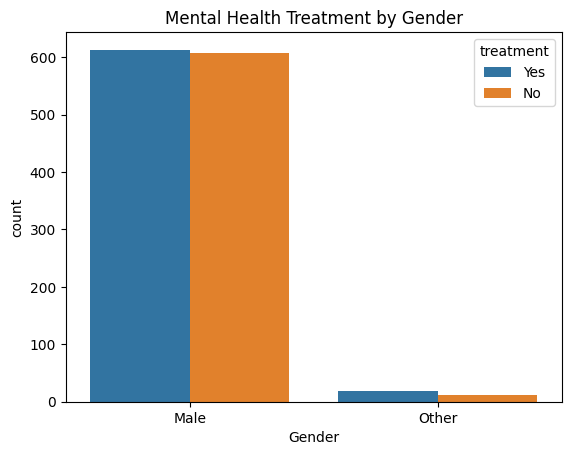

In [19]:
# Treatment vs Gender
plt.figure()
sns.countplot(data=df, x="Gender", hue="treatment")
plt.title("Mental Health Treatment by Gender")
plt.show()       

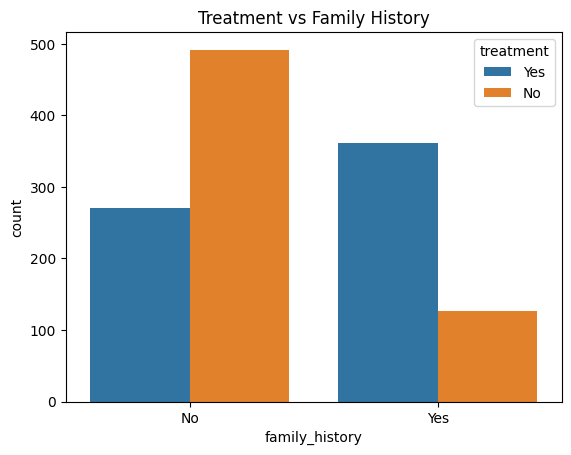

In [20]:
# Treatment vs Family History
plt.figure()
sns.countplot(data=df, x="family_history", hue="treatment")
plt.title("Treatment vs Family History")
plt.show()

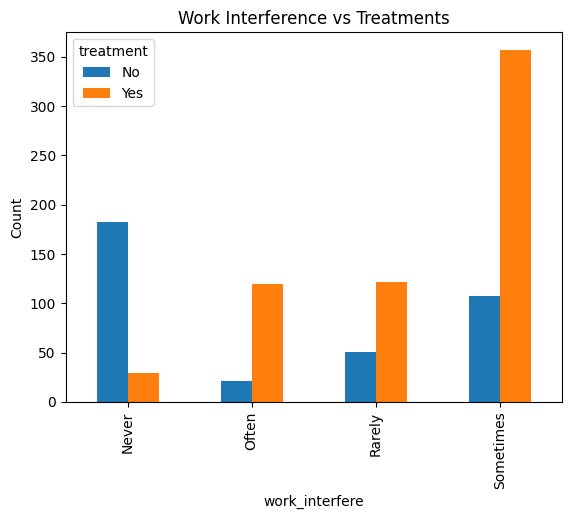

In [21]:
# Work Interference vs Treatment
# Cross-tabulation
work_treatment = pd.crosstab(df["work_interfere"], df["treatment"])

# Bar plot
work_treatment.plot(kind="bar")
plt.title("Work Interference vs Treatments")
plt.ylabel("Count")
plt.show()

## Feature Engineering
Prepare the dataset for machine learning by encoding categorical variables.

In [23]:
# Select relevant features
features = df.loc[:, ["Age", "Gender", "family_history", "work_interfere"]]
target = df.loc[:, "treatment"]

# Encode categorical variables
le = LabelEncoder()

for col in features.columns:
    if features[col].dtype == "object":
        features.loc[:, col] = le.fit_transform(features[col])

target = le.fit_transform(target)

## Machine Learning Model (Logistic Regression)
To use Logistic Regression to predict whether a person has sought mental health treatment.

In [25]:
# Train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

In [26]:
# Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.64      0.85      0.73       115
           1       0.83      0.60      0.70       135

    accuracy                           0.72       250
   macro avg       0.74      0.73      0.71       250
weighted avg       0.74      0.72      0.71       250



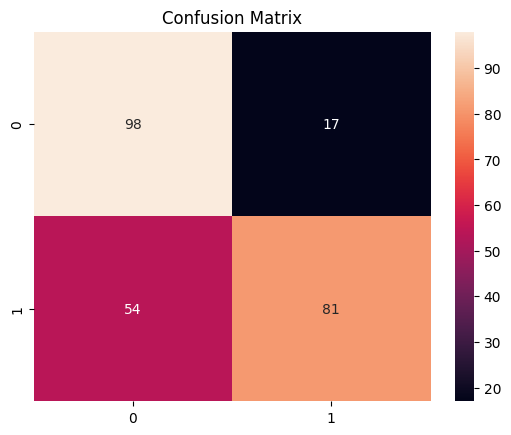

In [27]:
# Confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.show()

## Findings & Insights
- Family history is the strongest indicator of mental health treatment.
- Workplace interference correlates strongly with treatment seeking.
- Gender diffrences exist in treatment reporting.
- Age has a weaker influence compared to psychosocial factors.

## Conclusion

This project demonstrates a complete data science workflow using a real dataset.
It highlights the importance of worlplace mental health awareness and show how data-driven approches can uncover meaningful insights.

Feature imporovments could include:
- Advance models (Random Forest, XGBoost)
- Text analysis on comments.
- Time-Based trend analysis.